# Lojistik Regresyon Tahmin Projesi

## Kütüphanelerin entegre edilmesi.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix




## Veriyi "df" değişkenine atayalım ve keşifçi veri analizi yapalım.

In [4]:
df=pd.read_csv(r"C:\Users\E4EATLAS\Downloads\heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.isna().sum() # Hiç eksik verimiz yok.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.isnull().values.any() # Veri setinde 1 tane dahi eksik verimiz yok.

False

In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.shape

(1025, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [65]:
df.duplicated() # Yinelenen değerleri bu şekilde görebiliriz.


0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool

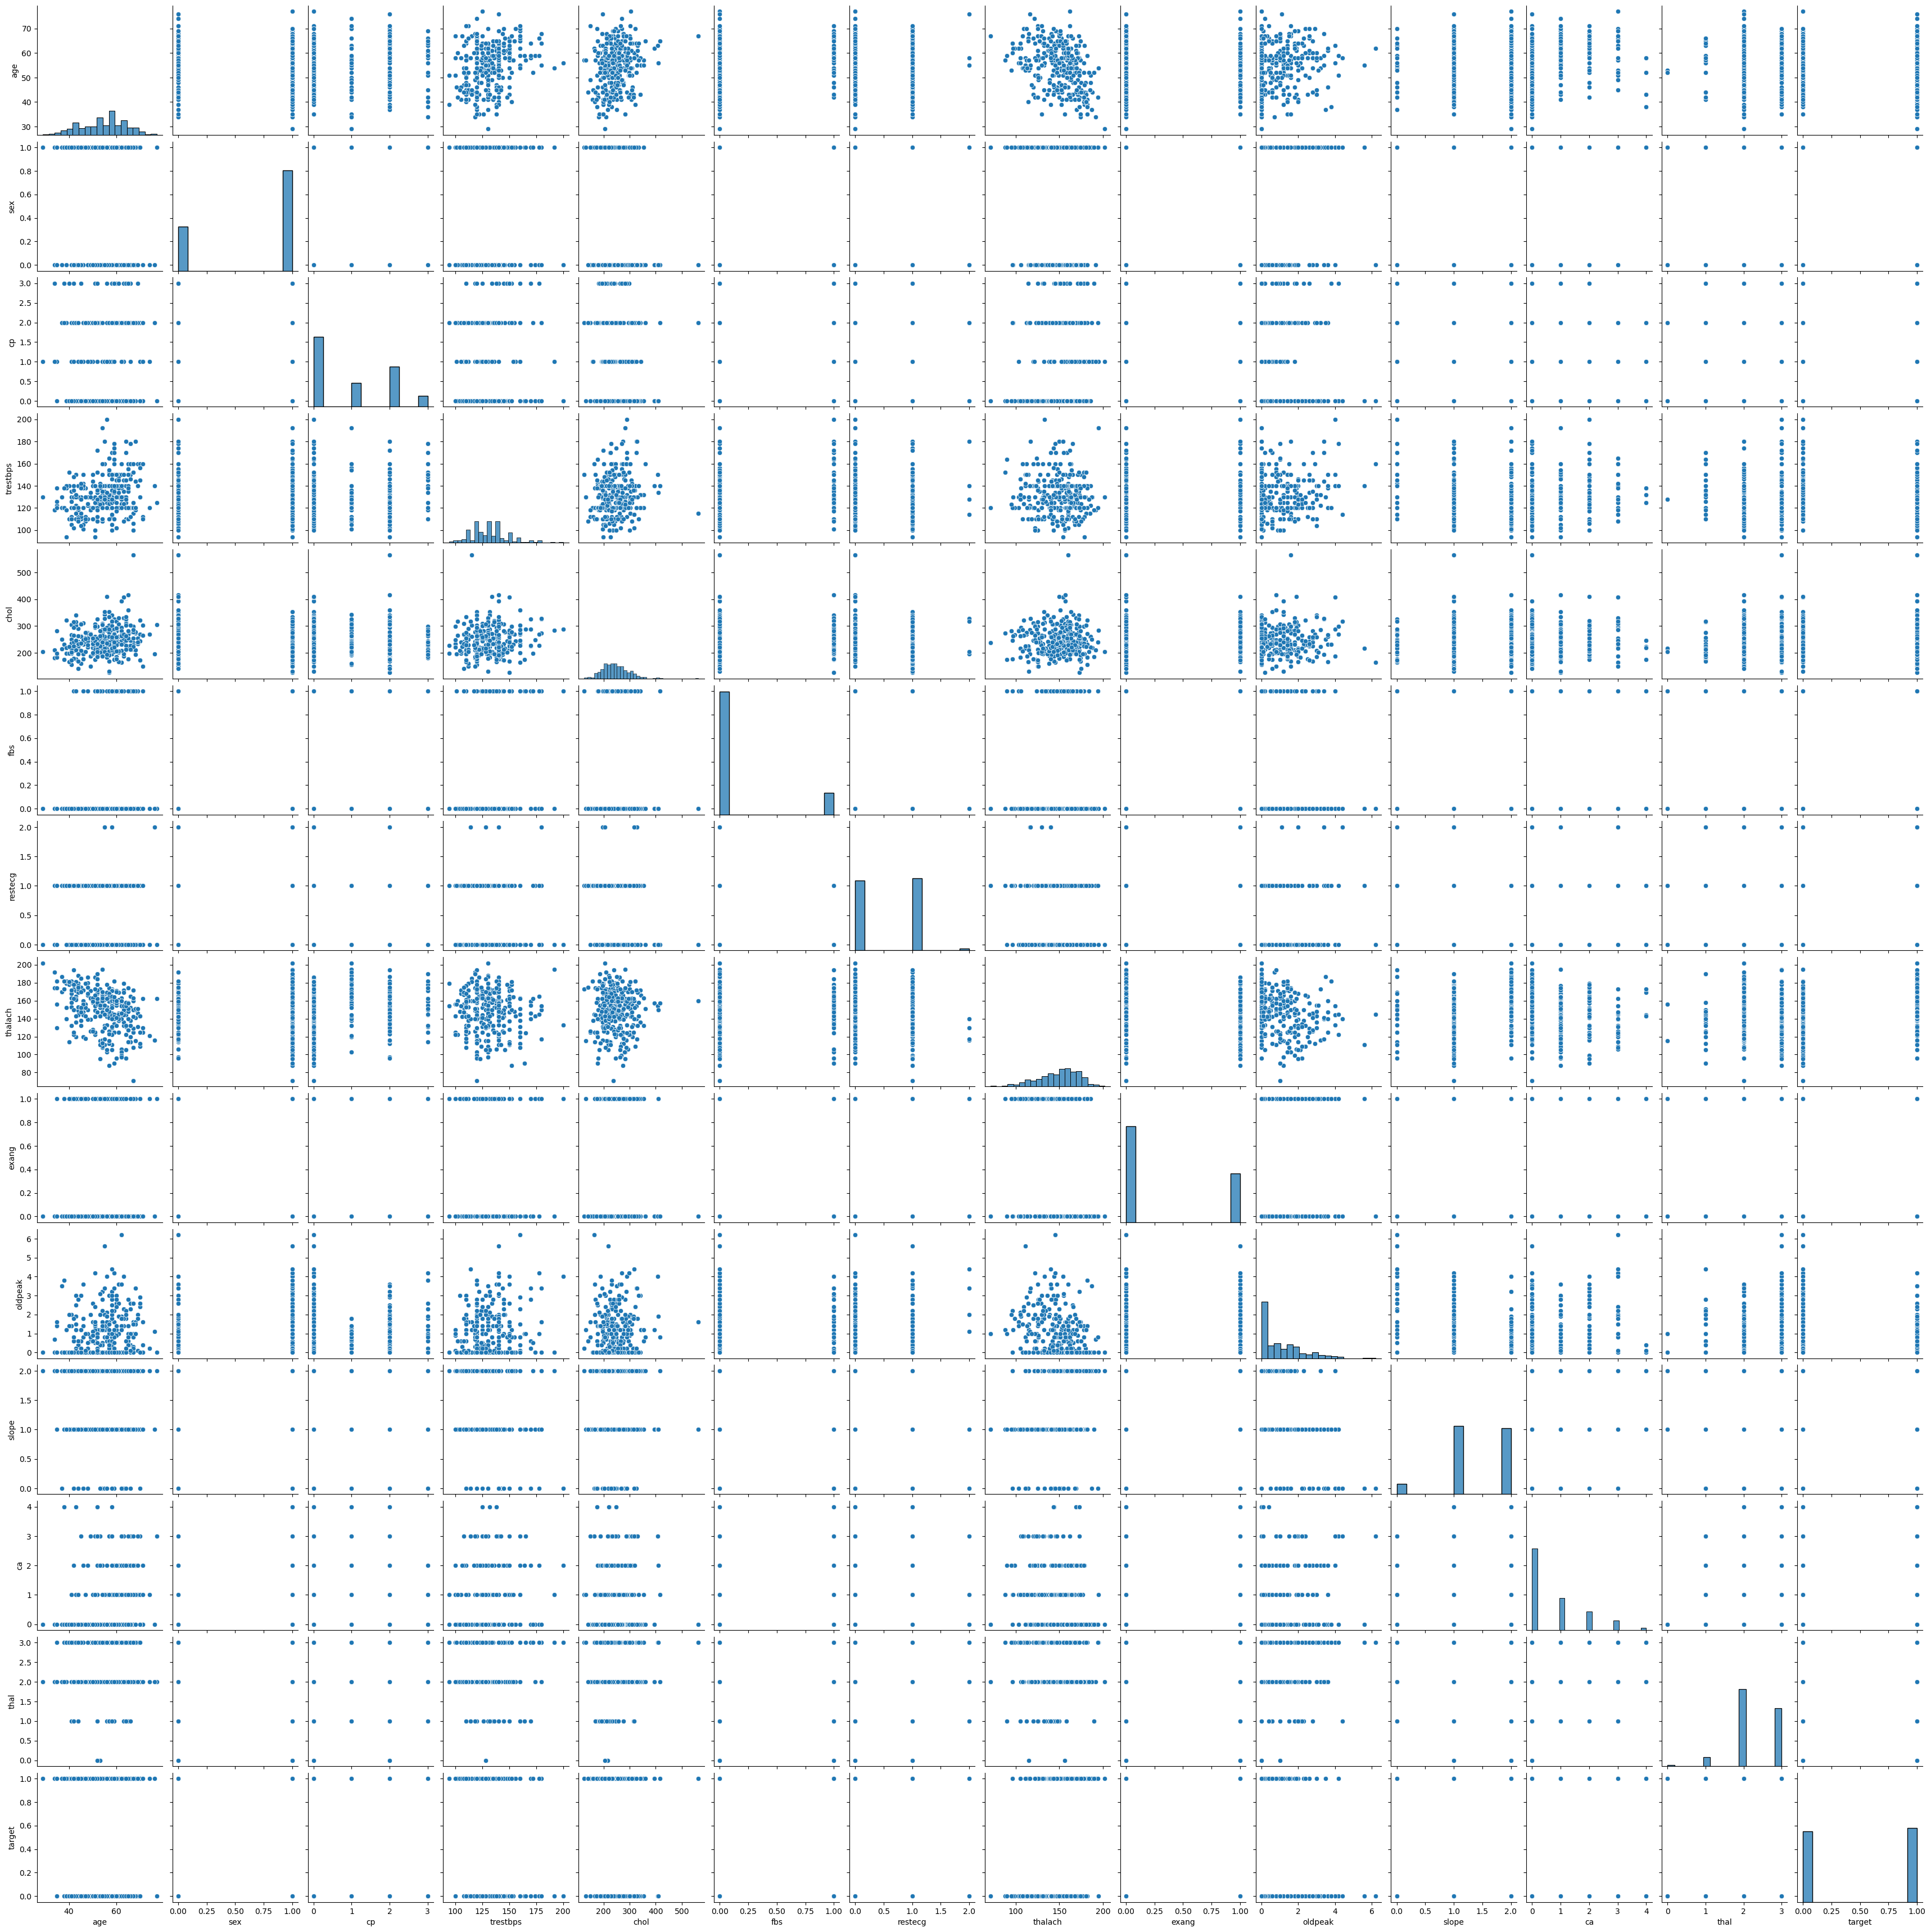

In [66]:
sns.pairplot(df)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

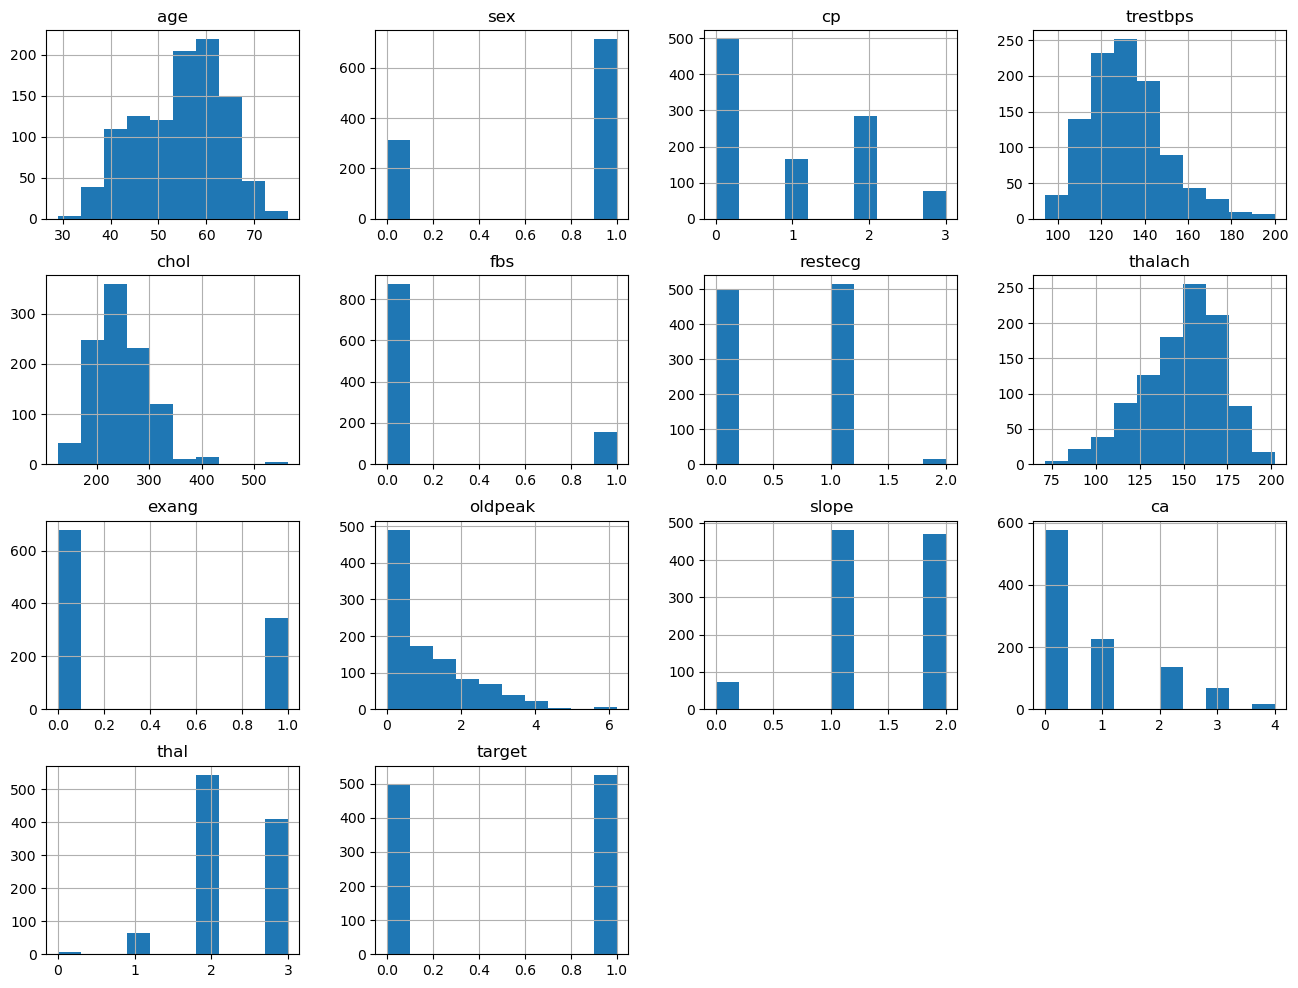

In [70]:
df.hist(bins=10,figsize=(16,12)) #Tüm sütunlardaki değerlerin histogram grafiklerini hızlıca bu şekilde çizdirebiliriz.

In [11]:
df["age"].unique() # Adayların yaşları 50 ila 70 arasında dağılmış gibi görünüyor.

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

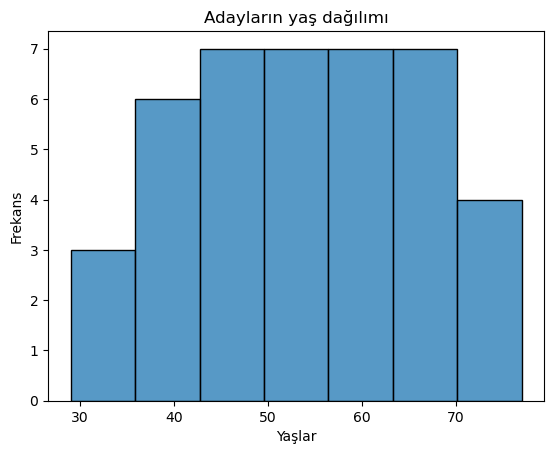

In [105]:
# Deneyimizde hasta adaylarının yaşının dağılımını görmek için sns.histplot metodunu kullanalım.
sns.histplot(df["age"].unique())
plt.xlabel('Yaşlar')
plt.ylabel('Frekans')
plt.title("Adayların yaş dağılımı")

plt.show()

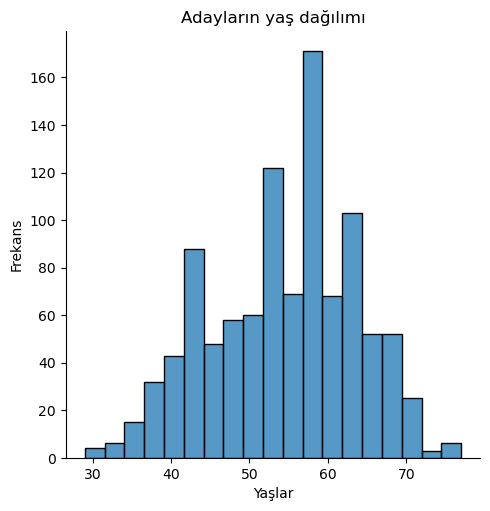

In [109]:
sns.displot(df["age"])
plt.xlabel('Yaşlar')
plt.ylabel('Frekans')
plt.title("Adayların yaş dağılımı")

plt.show()

Text(0.5, 1.0, 'Cinsiyete bağlı yaş grafiği')

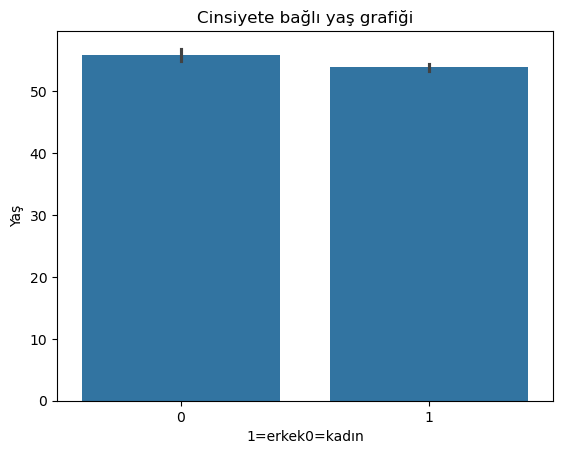

In [75]:
sns.barplot(x='sex', y='age', data=df, ) # 1 erkeği 0 kadını göstermek üzere kadın ve erkekten kaçar tane varmış görelim.
plt.xlabel("1=erkek" "0=kadın")
plt.ylabel("Yaş")
plt.title("Cinsiyete bağlı yaş grafiği")

Text(0.5, 1.0, 'Cinsiyete bağlı yaş grafiği')

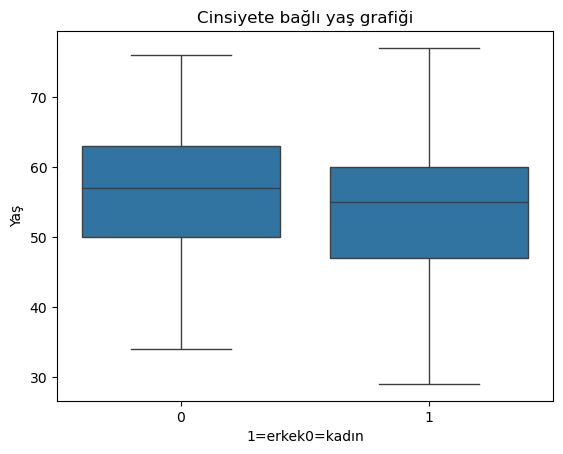

In [76]:
sns.boxplot(x=df.sex, y=df.age) # Kadın ve erkeklerin yaşları hangi aralıkta dağılmış görelim.
plt.xlabel("1=erkek" "0=kadın")
plt.ylabel("Yaş")
plt.title("Cinsiyete bağlı yaş grafiği")

Text(0.5, 1.0, 'Adayların yaşa bağlı kolesterol dağılımı')

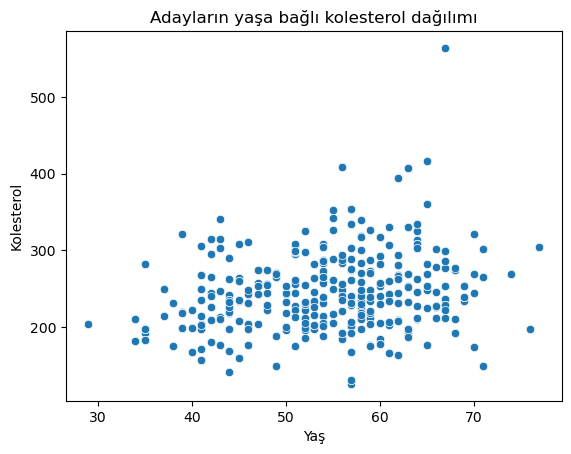

In [48]:
sns.scatterplot(x=df["age"],y=df["chol"],data=df,marker="o")
plt.xlabel('Yaş')
plt.ylabel('Kolesterol')
plt.title("Adayların yaşa bağlı kolesterol dağılımı")

Text(0.5, 1.0, 'Yaşa göre kalp atış hızları')

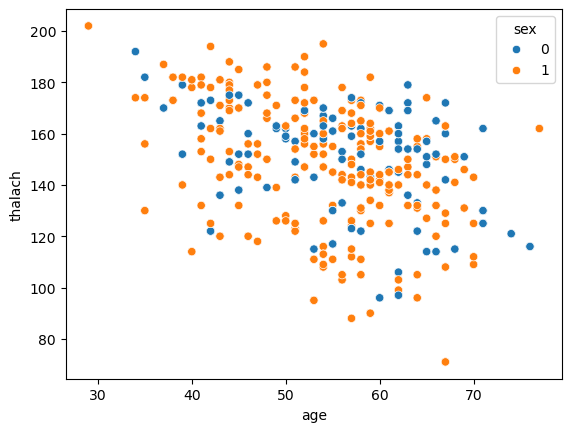

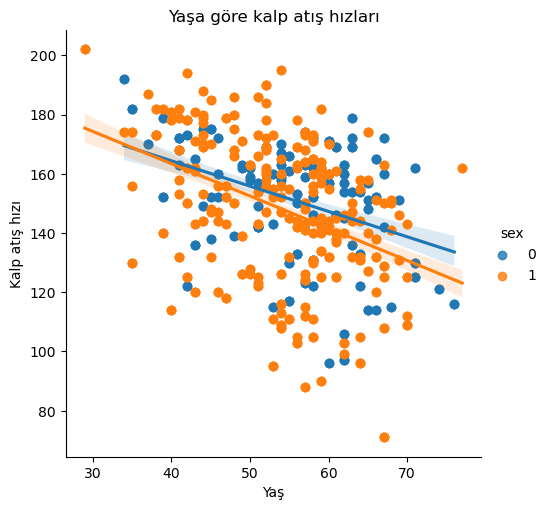

In [116]:
# Kalp atış hızı en yüksek yaşları görelim ve regrosyon doğrusu çizdirelim.
# hue parametresi 3.bir kategorik değişken ekler.
sns.scatterplot(x=df["age"],y=df["thalach"],data=df,marker="o",hue="sex")
sns.lmplot(data=df, x="age", y="thalach",hue="sex")
plt.xlabel('Yaş')
plt.ylabel('Kalp atış hızı')
plt.title("Yaşa göre kalp atış hızları")


<Figure size 1700x1000 with 0 Axes>

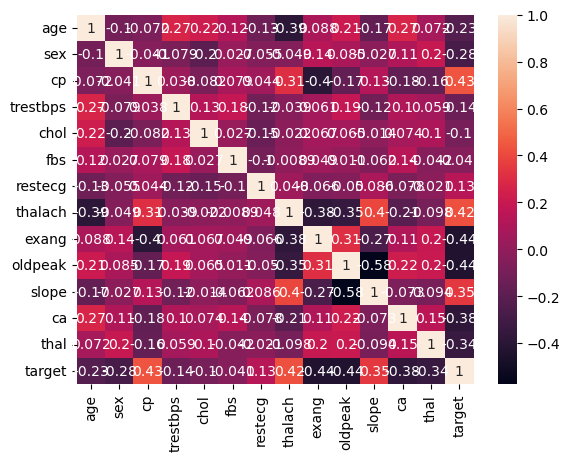

<Figure size 1700x1000 with 0 Axes>

In [91]:
sns.heatmap(data=df.corr(),annot=True)
plt.figure(figsize=(17,10))

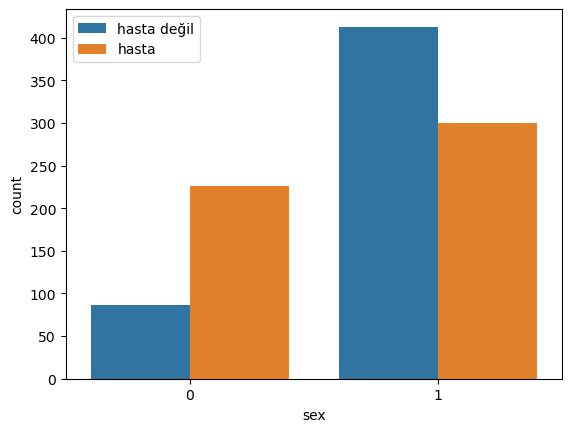

In [104]:
sns.countplot(x="sex",data=df,hue="target")  # Kadın ve Erkeklerin sayısını ve başarıp başaramayanların sayısını bu metodla görebiliriz.
plt.legend(labels=["hasta değil","hasta"])

## Bağımlı ve bağımsız değişkenleri train test split metoduyla kullanalım.

In [14]:
y=df["target"]
X=df.drop("target",axis=1)

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

## Modelimizi fit edelim ve scorumuza bakalım.

In [16]:
log=LogisticRegression()
model=log.fit(X_train,y_train)
model.score(X_test,y_test)

c:\Users\E4EATLAS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8341463414634146

## Doğruluk puanımızı hesaplayalım.

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Accucarcy score: ", accuracy_score(y_test,y_pred))

Accucarcy score:  0.8341463414634146


## Karmaşıklık matrisini ısı haritası olarak çizdirelim.

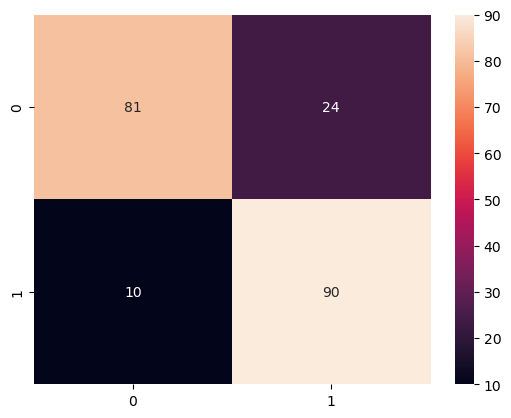

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()